In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ranksums


In [5]:
def Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag):
    
    
    Number_Of_Variables = problem.Number_Of_Variables
    Upper_Bounds = problem.Upper_Bounds
    Lower_Bounds = problem.Lower_Bounds
    
#     Number_Of_Variables = 10 # they called this nVar
#     Upper_Bounds = 10*np.ones(Number_Of_Variables) ## they called thus up
#     Lower_Bounds = -10*np.ones(Number_Of_Variables) ## they called it lb


    
    
    ### Defining the hyperparameters



    # Weight_Of_Inertia = 1 ## This is the hyperparameter "w"
    W_Max = 0.9 ## this is the Initial weight of the inertia
    W_Min = 0.2 ## this is the final weight of the inertia
    c1 = 2 ## This is the individual weight (best found location so far)
    c2 = 2 ## this is the social weight (best found location from team)
    vMax = (Upper_Bounds - Lower_Bounds)*0.2
    vMin = -vMax






    ## initializing the Swarm object


    class Particles(object):
        def __init__(self, Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST):
            self.V = np.zeros((Number_Of_Particles,Number_Of_Variables))
            self.X = np.zeros((Number_Of_Particles,Number_Of_Variables))
            self.O = 10**30*np.ones(Number_Of_Particles)
            for k in range (0,Number_Of_Particles):
                self.X[k,:] = (Upper_Bounds-Lower_Bounds)*np.random.rand(Number_Of_Variables ) + Lower_Bounds


            self.PBEST = PBEST(Number_Of_Variables,Number_Of_Particles)

    class PBEST(object):

        def __init__(self,Number_Of_Variables,Number_Of_Particles):
    #             self.X[k,:] = np.zeros(Number_Of_Variables)
                self.X = np.zeros((Number_Of_Particles,Number_Of_Variables))
                self.O = 10**30*np.ones(Number_Of_Particles)



    class GBEST(object):

        def __init__(self,Number_Of_Variables,Number_Of_Particles):
    #             self.X[k,:] = np.zeros(Number_Of_Variables)
                self.X = np.zeros(Number_Of_Variables)
                self.O = 10**30


    class Swarm(object):

        def __init__(self,Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles):
            self.Particles = Particles(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST)
            self.GBEST = GBEST(Number_Of_Variables,Number_Of_Particles)


    
    
    
    
    ################ This is the main Loop
    Swarm1 = Swarm(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles)



    # print(Swarm1.Particles.PBEST.O)
    Cost_Vector = np.zeros(Number_Of_Iterations)
    for t in range(0,Number_Of_Iterations):

        ## this is to get the 
        for k in range(0,Number_Of_Particles):

            ## Calculate the curent Objective
            Swarm1.Particles.O[k] = problem.fobj(Swarm1.Particles.X[k,:]) 

            ##  update PBEST
            if Swarm1.Particles.O[k] < Swarm1.Particles.PBEST.O[k]:
                Swarm1.Particles.PBEST.O[k] = Swarm1.Particles.O[k]
                Swarm1.Particles.PBEST.X[k,:] = Swarm1.Particles.X[k,:]          

            ## Update GBEST
            if Swarm1.Particles.O[k] < Swarm1.GBEST.O:
                Swarm1.GBEST.O = Swarm1.Particles.O[k]   
                Swarm1.GBEST.X[:] = Swarm1.Particles.X[k,:]  

        #### Update the X and V vectors
        w = W_Max - t*(W_Max - W_Min)/Number_Of_Iterations

        for k in range(0,Number_Of_Particles):
            Swarm1.Particles.V[k,:] = w*Swarm1.Particles.V[k,:]\
                                    + c1*np.random.rand(Number_Of_Variables)*(Swarm1.Particles.PBEST.X[k,:] - Swarm1.Particles.X[k,:] )\
                                    + c2*np.random.rand(Number_Of_Variables)*(Swarm1.GBEST.X- Swarm1.Particles.X[k,:] )




            ## Velocity Checking and limitation
            index1 = np.nonzero(Swarm1.Particles.V[k,:] > vMax)
            index2 = np.nonzero(Swarm1.Particles.V[k,:] < vMin)

            if Swarm1.Particles.V[k,index1].shape[1] >= 1:
                Swarm1.Particles.V[k,index1] = vMax[index1]

            if Swarm1.Particles.V[k,index2].shape[1] >= 1:
                Swarm1.Particles.V[k,index2] = vMin[index2]



            ## Position Checking and limitation
            index1 = np.nonzero(Swarm1.Particles.V[k,:] > Upper_Bounds[0])
            index2 = np.nonzero(Swarm1.Particles.V[k,:] < Lower_Bounds[0])

            if Swarm1.Particles.V[k,index1].shape[1] >= 1:
                Swarm1.Particles.V[k,index1] = Upper_Bounds[index1]

            if Swarm1.Particles.V[k,index2].shape[1] >= 1:
                Swarm1.Particles.V[k,index2] = Lower_Bounds[index2]

            Swarm1.Particles.X[k,:] = Swarm1.Particles.X[k,:] + Swarm1.Particles.V[k,:]

    #     print(np.max(Swarm1.Particles.V))
        Cost_Vector[t] =    Swarm1.GBEST.O


        if Visualization_Flag:
            
            plt.plot(Cost_Vector)
    return Swarm1.GBEST.O, Swarm1.GBEST.X, Cost_Vector

1839
3.1396429926297773
4.206048167034314e-11


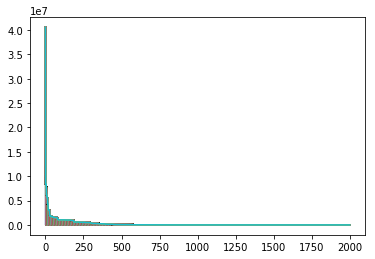

In [6]:
def fun(X_Swarm): ## this is the sphere function
    
#     print((10**(6*np.arange(len(X_Swarm))/len(X_Swarm))))
    return np.sum((10**(6*np.arange(len(X_Swarm))/len(X_Swarm)))*(X_Swarm )**2,0)




class Problem(object):
    
    def __init__(self,Number_Of_Variables):
            self.Number_Of_Variables = Number_Of_Variables
            self.Upper_Bounds = 10*np.ones(Number_Of_Variables) ## they called thus up
            self.Lower_Bounds = -10*np.ones(Number_Of_Variables) ## they called it lb
            self.fobj = fun

            
Number_Of_Variables = 40
problem = Problem(Number_Of_Variables)
Visualization_Flag = 1


Number_Of_Particles = 30 ### they called this noP
Number_Of_Iterations = 2000 ## They called this maxlter


O_min,X_min,Cost_Vector = Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag)

First_Index_Below_10_Minus_8 = np.min(np.arange(Number_Of_Iterations)[np.nonzero(Cost_Vector < 10**-8)])

print(First_Index_Below_10_Minus_8)
print(np.log10(First_Index_Below_10_Minus_8*Number_Of_Particles/Number_Of_Variables))
print(O_min)

0
14856.911644077562
10861.177036036057
1
21996.59802629044
13261.013503489556
2
104665.07766820988
14483.485404479112
3
28490.832862511124
43284.74643583013
4
34489.873423461395
16146.244503075135
Average results 1: 40899.85872491008
Average results 2: 19607.333376582
Average STD 1: 32547.329656979404
Average STD 2: 11963.476669218442
statistic 1.5666989036012806
pvalue 0.11718508719813801


'The results of the better algorithm is not that statistically segnificant'

"it isn't that certain that the better algorithm is much better"

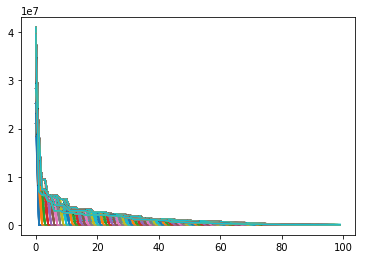

In [25]:


Number_Of_Particles = 30 ### they called this noP
Number_Of_Iterations = 100 ## They called this maxlter

Number_Of_Runs = 5
O_min1 = np.zeros(Number_Of_Runs)
O_min2 = np.zeros(Number_Of_Runs)
for i in range (0,Number_Of_Runs):
    print(i)
    Number_Of_Particles = 30 ### they called this noP
    O_min1[i],X_min,Cost_Vector1 = Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag)
    print(O_min1[i])




    Number_Of_Particles = 40 ### they called this noP
    # Number_Of_Iterations = 500 ## They called this maxlter


    O_min2[i],X_min,Cost_Vector2 = Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag)
    print(O_min2[i])



print("Average results 1:",np.mean(O_min1))
print("Average results 2:",np.mean(O_min2))
print("Average STD 1:",np.std(O_min1))
print("Average STD 2:",np.std(O_min2))


a = ranksums(O_min1,O_min2)

print("statistic",a.statistic)
print("pvalue",a.pvalue)


### the meaning of the pvalue here is that the lower the threshold - the more segnificantly different their perfomrmance is:
### That means that we are more certain that the algorithms with a lower average - is truly better than the one with the higher one
## The lower this is the more certain we are that the better algorithm is truly better
P_Value_Threshold_To_Determine_Statistical_Segnificance = 0.05 


if a.pvalue < P_Value_Threshold_To_Determine_Statistical_Segnificance:
    display("The results of the better algorithm are statistically segnificant")
    display("The better algorithm is truly better")
if a.pvalue > P_Value_Threshold_To_Determine_Statistical_Segnificance:
    display("The results of the better algorithm are not that statistically segnificant")
    display("it isn't that certain that the better algorithm is much better")

In [14]:


a = ranksums(Cost_Vector1,Cost_Vector2)

print("statistic",a.statistic)
print("pvalue",a.pvalue)

-1.784245459610269
0.07438378838302424
